### Setup

In [100]:
import pandas as pd
import altair as alt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import importlib
import utils
# Cache-Probleme umgehen
importlib.reload(utils)
from utils import save_full_workflow
from utils import load_model
from utils import load_features
from utils import load_results
from utils import full_pipeline
from utils import load_residual_plot
from utils import load_validation_results
from utils import load_summary_table

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [101]:
# Farbgebung in Diagrammen
color1 = '#06507F'  # Dunkelblau
color2 = '#330241'  # Dunkellila
color3 = '#0076BF'  # Blau
color4 = '#80BADF'  # Hellblau
color5 = '#E7DDFF'  # Helllila
custom_cmap = LinearSegmentedColormap.from_list('custom', ['#FFFFFF', color1])

### Data import

In [102]:
path_data = 'https://raw.githubusercontent.com/mm391-030401/project/refs/heads/main/data/processed/'
file_data= 'data_final.csv'

data = pd.read_csv(path_data + file_data, sep=',', encoding='utf-8')

# Obwohl diese Spalten bereits im Notebook "convert_columns" zu Strings konvertiert wurden, wurden sie beim erneuten Einlesen wieder als Integer erkannt
# Allerdings ist es sinnvoll, diese Spalten nicht als Integer (diskret) zu betrachten 
# sondern als ordinale Variablen (Rechenoperationen sind nicht sinnig für die Zeitangaben)
to_str_cols = ['monat', 'monat_jahr','monat_monat', 'kohorte', 'kohorte_jahr', 'kohorte_monat']

# Konvertierung der Spalten in string 
for col in to_str_cols: 
    data[col] = data[col].astype(str)

### Variables

In [103]:
y_label = 'retentionrate'
features = ['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte']

In [104]:
# Name des aktuell getesteten Modells
model_name = '02_20241229_Lineare_Regression_Basic'

### Model

#### Pipeline

In [105]:
full_pipeline(data, y_label, features, model_name)

Modell gespeichert unter: c:\Users\miche\HdM\Data Analytics with Statistics\Git\project\models\02_20241229_Lineare_Regression_Basic.joblib
Features gespeichert unter: c:\Users\miche\HdM\Data Analytics with Statistics\Git\project\models\02_20241229_Lineare_Regression_Basic_features.json
Ergebnisse gespeichert unter: c:\Users\miche\HdM\Data Analytics with Statistics\Git\project\models\02_20241229_Lineare_Regression_Basic_results.csv
Kreuzvalidierungsergebnisse gespeichert unter: c:\Users\miche\HdM\Data Analytics with Statistics\Git\project\models\02_20241229_Lineare_Regression_Basic_validation.csv
Residualplot gespeichert unter: c:\Users\miche\HdM\Data Analytics with Statistics\Git\project\models\02_20241229_Lineare_Regression_Basic_residual_plot.png
Zusammenfassungstabelle gespeichert unter: c:\Users\miche\HdM\Data Analytics with Statistics\Git\project\models\02_20241229_Lineare_Regression_Basic_summary.csv

Modellzusammenfassung:
                                       Name  Coefficient

#### Model

In [106]:
load_model(model_name)

LinearRegression()

#### Training and Validation

In [107]:
df_scores = pd.DataFrame(load_validation_results(model_name))
df_scores

,MSE
0,99.282139
1,73.893149
2,87.929751
3,73.005082
4,99.436467


In [108]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
MSE,5.0,86.709317,12.976959,73.005082,73.893149,87.929751,99.282139,99.436467


#### Fit Model

In [109]:
load_summary_table(model_name)

,Name,Coefficient
0,Intercept,59.542
1,erster_monat_kohorte_fg,52.030
2,monate_seit_einfuehrung_programm_kohorte,-0.720


#### Evaluation on test set

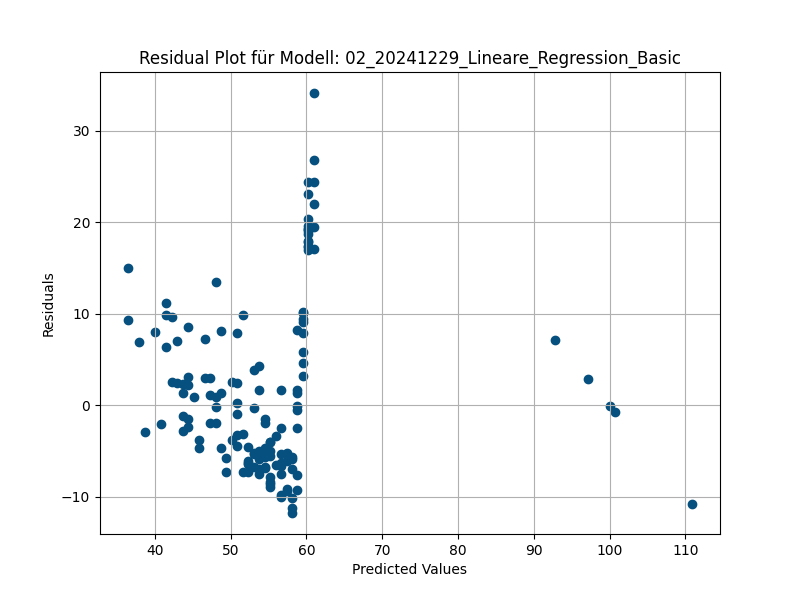

In [110]:
load_residual_plot(model_name)

In [111]:
pd.DataFrame(load_results(model_name))

,R_squared,MSE,RMSE,MAE
0,0.564548,94.883149,9.740798,7.466831
